In [1]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 388.9 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 544.7 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/300.2 kB 833.5 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.2 kB 748.1 kB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading dataset
data = pd.read_csv('netflix_titles.csv')

In [4]:
data.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [5]:
data.shape

(8807, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
# check if column values are null
null_counts = data.isnull().sum()


print(null_counts)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [8]:
data.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

## Filling missing values

#### Working with features with missing values, from lowest to highest

### duration 

In [9]:
data[data.isnull()['duration'] == True]

show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country          date_added  release_year  rating  \
5541  Louis C.K.  United States       April 4, 2017          2017  74 min   
5794  Louis C.K.  United States  September 16, 2016          2010  84 min   
5813  Louis C.K.  United States     August 15, 2016          2015  66 min   

     duration listed_in                                        description  
5541      NaN    Movies  Louis C.K. muses on religion, eternal love, gi...  
5794      NaN    Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813      NaN    Movies  The comic puts his trademark hilarious/thought...

In [10]:
# transfer missing values from duration to rating column
index = list(data[data.isnull()['duration'] == True].index)
data.loc[index, 'duration'] = data.loc[index, 'rating']
data.loc[index,'rating'] = np.nan
data.loc[index,:]



show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country          date_added  release_year rating  \
5541  Louis C.K.  United States       April 4, 2017          2017    NaN   
5794  Louis C.K.  United States  September 16, 2016          2010    NaN   
5813  Louis C.K.  United States     August 15, 2016          2015    NaN   

     duration listed_in                                        description  
5541   74 min    Movies  Louis C.K. muses on religion, eternal love, gi...  
5794   84 min    Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813   66 min    Movies  The comic puts his trademark hilarious/thought...

### rating :


In [11]:
print('Number of Unique Values in rating including Nan : ', len(data['rating'].unique())) 
print(data['rating'].value_counts())

Number of Unique Values in rating including Nan :  15
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


In [12]:
#I use TF-IDF Vectorizer to transform the text data of the Rating property.
#created a new data frame that contains 2 properties: rating and description.
#In the Rating property we store the index numbers of rows with a nan value

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

tfidf = TfidfVectorizer(stop_words= 'english')
index = list(data[data.isnull()['rating'] == True].index)

df1 = data[['rating','description']].copy(deep = True)
df1.drop(index = index,inplace = True)
df1.head()

rating                                        description
0  PG-13  As her father nears the end of his life, filmm...
1  TV-MA  After crossing paths at a party, a Cape Town t...
2  TV-MA  To protect his family from a powerful drug lor...
3  TV-MA  Feuds, flirtations and toilet talk go down amo...
4  TV-MA  In a city of coaching centers known to train I...

In [13]:
#Converting the values of the **rating** property

le = LabelEncoder()
print('Label Encoder Transformation')
df1['rating'] = le.fit_transform(df1['rating'])
print('rating : ',df1['rating'].unique(),' = ',le.inverse_transform(df1['rating'].unique()))

Label Encoder Transformation
rating :  [ 4  8  3  6  9 10 11  5  7  0  1  2 12 13]  =  ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']


In [14]:
#split the data into train - test.
#keep the rows with nan in the test section because I want to predict them 
#The values are located in the train section.


x_train = tfidf.fit_transform(df1['description']).toarray()
x_test = tfidf.transform(data.loc[index,'description']).toarray()
y_train = df1['rating'].values


In [15]:
# Used the Multinomial Naive Bayes algorithm as it is the go-to algorithm for any text data.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(x_train,y_train)

#print the predicted values on the screen
print('Predicted Value : ',clf.predict(x_test),' = ',le.inverse_transform(clf.predict(x_test)))

Predicted Value :  [8 8 8 8 8 8 8]  =  ['TV-MA' 'TV-MA' 'TV-MA' 'TV-MA' 'TV-MA' 'TV-MA' 'TV-MA']


In [16]:
# Based on this result, we need to fill the missing values in the rating column with TV-MA.
data['rating'].fillna('TV-MA',inplace = True)


### date_added:

In [17]:
data[data.isnull()['date_added'] == True]

show_id     type                                        title director  \
6066   s6067  TV Show  A Young Doctor's Notebook and Other Stories      NaN   
6174   s6175  TV Show              Anthony Bourdain: Parts Unknown      NaN   
6795   s6796  TV Show                                      Frasier      NaN   
6806   s6807  TV Show                                      Friends      NaN   
6901   s6902  TV Show                              Gunslinger Girl      NaN   
7196   s7197  TV Show                                     Kikoriki      NaN   
7254   s7255  TV Show                          La Familia P. Luche      NaN   
7406   s7407  TV Show                                        Maron      NaN   
7847   s7848  TV Show                                 Red vs. Blue      NaN   
8182   s8183  TV Show                 The Adventures of Figaro Pho      NaN   

                                                   cast         country  \
6066  Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...  United Kingdom   
6174                                   Anthony Bourdain   United States   
6795  Kelsey Grammer, Jane Leeves, David Hyde Pierce...   United States   
6806  Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...   United States   
6901  Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...           Japan   
7196                                      Igor Dmitriev             NaN   
7254  Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...   United States   
7406  Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...   United States   
7847  Burnie Burns, Jason Saldaña, Gustavo Sorola, G...   United States   
8182  Luke Jurevicius, Craig Behenna, Charlotte Haml...       Australia   

     date_added  release_year rating    duration  \
6066        NaN          2013  TV-MA   2 Seasons   
6174        NaN          2018  TV-PG   5 Seasons   
6795        NaN          2003  TV-PG  11 Seasons   
6806        NaN          2003  TV-14  10 Seasons   
6901        NaN          2008  TV-14   2 Seasons   
7196        NaN          2010   TV-Y   2 Seasons   
7254        NaN          2012  TV-14   3 Seasons   
7406        NaN          2016  TV-MA   4 Seasons   
7847        NaN          2015     NR  13 Seasons   
8182        NaN          2015  TV-Y7   2 Seasons   

                                              listed_in  \
6066           British TV Shows, TV Comedies, TV Dramas   
6174                                         Docuseries   
6795                     Classic & Cult TV, TV Comedies   
6806                     Classic & Cult TV, TV Comedies   
6901                       Anime Series, Crime TV Shows   
7196                                           Kids' TV   
7254  International TV Shows, Spanish-Language TV Sh...   
7406                                        TV Comedies   
7847  TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
8182                              Kids' TV, TV Comedies   

                                            description  
6066  Set during the Russian Revolution, this comic ...  
6174  This CNN original series has chef Anthony Bour...  
6795  Frasier Crane is a snooty but lovable Seattle ...  
6806  This hit sitcom follows the merry misadventure...  
6901  On the surface, the Social Welfare Agency appe...  
7196  A wacky rabbit and his gang of animal pals hav...  
7254  This irreverent sitcom featues Ludovico, Feder...  
7406  Marc Maron stars as Marc Maron, who interviews...  
7847  This parody of first-person shooter games, mil...  
8182  Imagine your worst fears, then multiply them: ...

In [18]:
# define the function to fill in missing values

def fillMissingDate(date):
    index = list(data[data.isnull()['date_added'] == True].index)
    data.loc[index,'date_added'] = [ date + " , " + str(i) for i in data.loc[index,'release_year']]

fillMissingDate('August 7') 

In [19]:
data[data['show_id'] == 's6067']

show_id     type                                        title director  \
6066   s6067  TV Show  A Young Doctor's Notebook and Other Stories      NaN   

                                                   cast         country  \
6066  Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...  United Kingdom   

           date_added  release_year rating   duration  \
6066  August 7 , 2013          2013  TV-MA  2 Seasons   

                                     listed_in  \
6066  British TV Shows, TV Comedies, TV Dramas   

                                            description  
6066  Set during the Russian Revolution, this comic ...

### country & cast & director:

In [20]:
#it does not make sense to estimate any values for these columns. 
#based on this we will fill the empty values with "No Information" only

data['country'].fillna('No Info',inplace = True)
data['cast'].fillna('No Info',inplace = True)
data['director'].fillna('No Info',inplace = True)

In [21]:
# Check the number of empty values in each column.
null_counts = data.isnull().sum()

print(null_counts)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


## Working with non-unique columns

### listed_in : 

For EDA purposes, I split the listed_in column into its unique values because there are more than 1 value available.

In [22]:
from tqdm import tqdm # progressbar usage

In [23]:
l1 = [j for i in data['listed_in'] for j in i.split(',')]
l2 = [i.strip() for i in l1]
listed_in = []
for i in tqdm(l2):
    if i not in listed_in:
        listed_in.append(i)
print('Number of Unique Values in listed_in : ',len(listed_in))

100%|██████████| 19323/19323 [00:00<00:00, 2416342.27it/s]

Number of Unique Values in listed_in :  42


In [24]:
listed = pd.DataFrame(columns = listed_in)

for i in tqdm(range(len(data))):
    split_text = data.loc[i,'listed_in'].split(',')
    cols = list(listed.columns)
    for j in range(len(split_text)):
        strip_text = split_text[j].strip(); listed.loc[i,strip_text] = 1 
        cols.remove(strip_text); listed.loc[i,cols] = 0
listed.head()


100%|██████████| 8807/8807 [00:24<00:00, 362.87it/s]


Documentaries International TV Shows TV Dramas TV Mysteries Crime TV Shows  \
0             1                      0         0            0              0   
1             0                      1         1            1              0   
2             0                      1         0            0              1   
3             0                      0         0            0              0   
4             0                      1         0            0              0   

  TV Action & Adventure Docuseries Reality TV Romantic TV Shows TV Comedies  \
0                     0          0          0                 0           0   
1                     0          0          0                 0           0   
2                     1          0          0                 0           0   
3                     0          1          1                 0           0   
4                     0          0          0                 1           1   

   ... Science & Nature TV Teen TV Shows Cult Movies TV Shows  \
0  ...                   0             0           0        0   
1  ...                   0             0           0        0   
2  ...                   0             0           0        0   
3  ...                   0             0           0        0   
4  ...                   0             0           0        0   

  Faith & Spirituality LGBTQ Movies Stand-Up Comedy Movies  \
0                    0            0               0      0   
1                    0            0               0      0   
2                    0            0               0      0   
3                    0            0               0      0   
4                    0            0               0      0   

  Stand-Up Comedy & Talk Shows Classic & Cult TV  
0                            0                 0  
1                            0                 0  
2                            0                 0  
3                            0                 0  
4                            0                 0  

[5 rows x 42 columns]

### Country : 

In [26]:
l1 = [j for i in data['country'] for j in i.split(',')]
l2 = [i.strip() for i in l1]
country = []
for i in tqdm(l2):
    if i not in country:
        country.append(i)
print('Number of Unique Values in country : ',len(country))

100%|██████████| 10850/10850 [00:00<00:00, 2713667.17it/s]

Number of Unique Values in country :  124


In [27]:
country = pd.DataFrame(columns = country)

for i in tqdm(range(len(data))):
    split_text = data.loc[i,'country'].split(',')
    cols = list(country.columns)
    for j in range(len(split_text)):
        strip_text = split_text[j].strip(); country.loc[i,strip_text] = 1 
        cols.remove(strip_text); country.loc[i,cols] = 0
country.head()

100%|██████████| 8807/8807 [00:34<00:00, 252.74it/s]


United States South Africa No Info India Ghana Burkina Faso United Kingdom  \
0             1            0       0     0     0            0              0   
1             0            1       0     0     0            0              0   
2             0            0       1     0     0            0              0   
3             0            0       1     0     0            0              0   
4             0            0       0     1     0            0              0   

  Germany Ethiopia Czech Republic  ... Jamaica Kazakhstan Lithuania  \
0       0        0              0  ...       0          0         0   
1       0        0              0  ...       0          0         0   
2       0        0              0  ...       0          0         0   
3       0        0              0  ...       0          0         0   
4       0        0              0  ...       0          0         0   

  Afghanistan Somalia Sudan Panama Uganda East Germany Montenegro  
0           0       0     0      0      0            0          0  
1           0       0     0      0      0            0          0  
2           0       0     0      0      0            0          0  
3           0       0     0      0      0            0          0  
4           0       0     0      0      0            0          0  

[5 rows x 124 columns]

## Analyzing the Dataset

### Content Type Analysis:

In [28]:
data['type']. value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

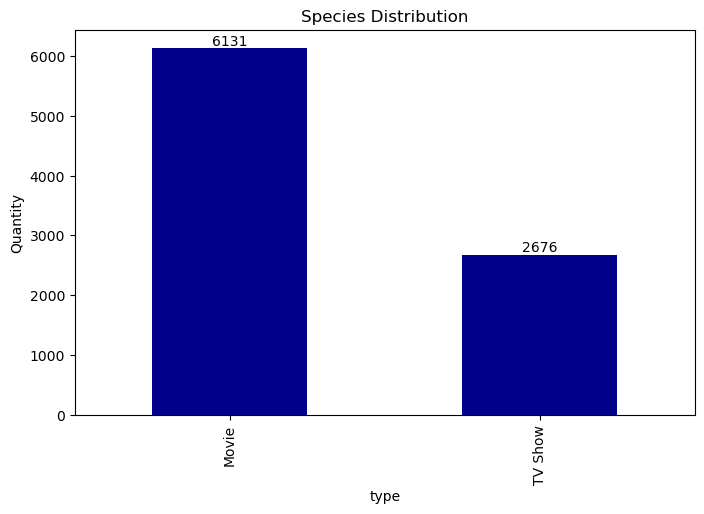

In [29]:
type_counts = data['type'].value_counts()

# draw the graphic
plt.figure(figsize=(8, 5))
ax = type_counts.plot(kind='bar',color='darkblue')
ax.bar_label(ax.containers[0], label_type='edge')
plt.ylabel('Quantity')
plt.title('Species Distribution')
plt.show()


In [30]:
movie_df = data[data['type'] == 'Movie']
tv_df = data[data['type'] == 'TV Show']

<Axes: xlabel='rating', ylabel='count'>

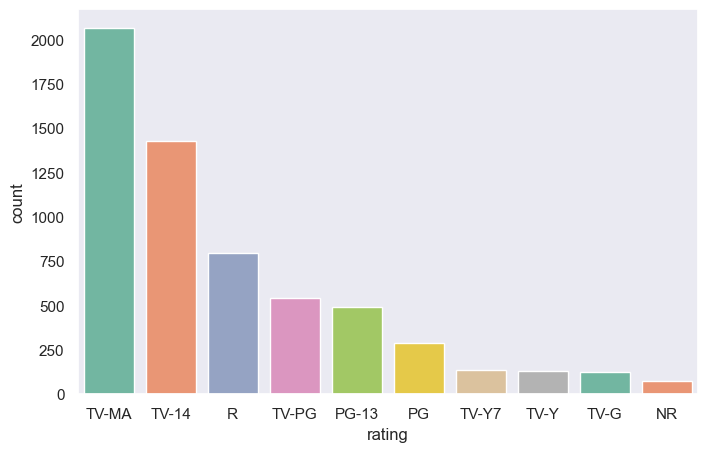

In [31]:
#film ratings
plt.figure(figsize=(8,5))
sns.set(style="dark")
sns.countplot(x="rating", data= movie_df, palette="Set2", order=movie_df['rating'].value_counts().index[0:10])

<Axes: xlabel='rating', ylabel='count'>

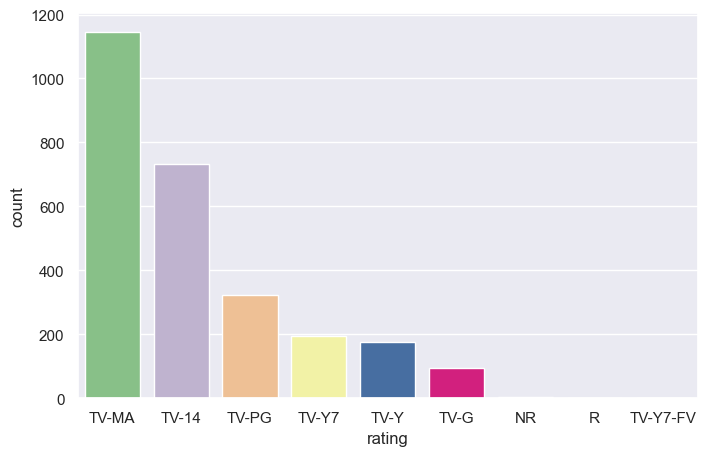

In [32]:
# TV SHOW rating
plt.figure(figsize=(8,5))
sns.set(style="darkgrid")
sns.countplot(x="rating", data=tv_df, palette="Accent", order=tv_df['rating'].value_counts().index[0:10])

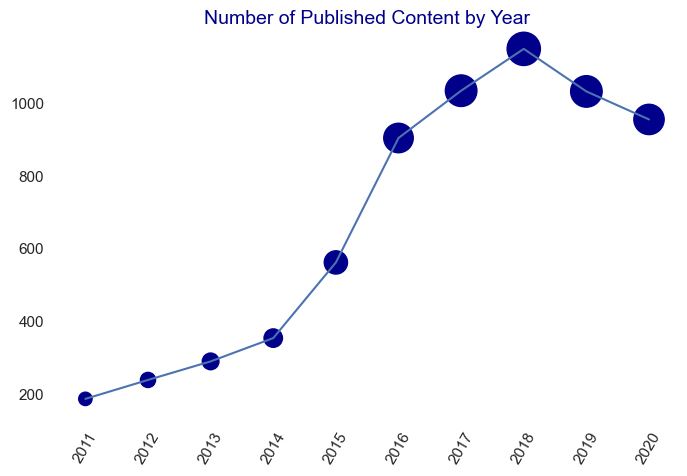

In [33]:
# Publishing content by year

release = data['release_year'].value_counts()
release = release.sort_index(ascending=True)

plt.figure(figsize=(8,5))
plt.plot(release[-11:-1])
plt.scatter(release[-11:-1].index, release[-11:-1].values, s=0.5*release[-11:-1].values, c='darkblue');
plt.box(on=None);
plt.xticks(rotation = 60)
plt.xticks(release[-11:-1].index);
plt.title('Number of Published Content by Year', color='darkblue', fontsize=14);

### Duration Analysis:

In [34]:
movies_duration = data[data['type'] == 'Movie']['duration']
movies_duration = movies_duration.str.extract('(\d+)', expand=False)
movies_duration = movies_duration.astype(float).fillna(0).astype(int)  
movies_average_duration = movies_duration.mean()

tv_shows_duration = data[data['type'] == 'TV Show']['duration']
tv_shows_duration = tv_shows_duration.str.extract('(\d+)', expand=False)
tv_shows_duration = tv_shows_duration.astype(float).fillna(0).astype(int)  
tv_shows_average_duration = tv_shows_duration.mean()

print("Average duration of movies: {} minutes".format(movies_average_duration))
print("Average duration of TV programs: {} seasons".format(tv_shows_average_duration))

Average duration of movies: 99.56499755341706 minutes
Average duration of TV programs: 1.764947683109118 seasons


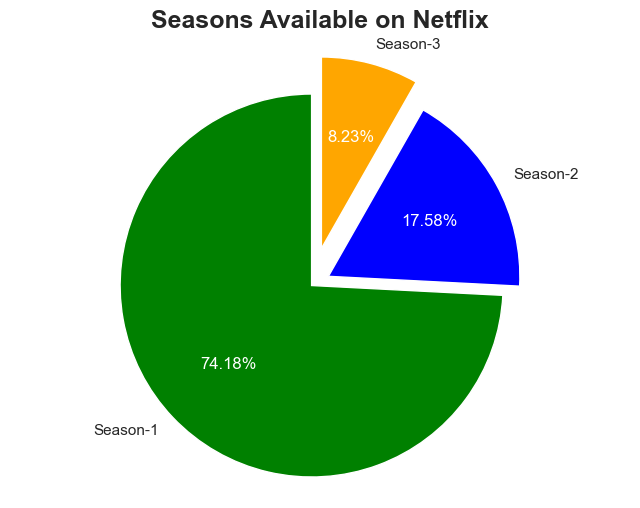

In [35]:
# TV Show seasons
plt.figure(figsize=(8, 6))
labels=['Season-1', 'Season-2', 'Season-3']
_, _, texts = plt.pie(data.duration.value_counts()[:3], labels=labels, autopct='%1.2f%%', startangle=90, 
                      explode=(0.0, 0.1, 0.2), colors=['green', 'blue', '#ffa600'])
plt.axis('equal')
plt.title('Seasons Available on Netflix', fontsize=18, fontweight='bold');
for text in texts:
    text.set_color('white')

In [36]:
movie_df['duration']=movie_df['duration'].str.replace(' min','')
movie_df['duration']=movie_df['duration'].astype(str).astype(int)
movie_df['duration']

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6131, dtype: int32

<Axes: xlabel='duration', ylabel='Density'>

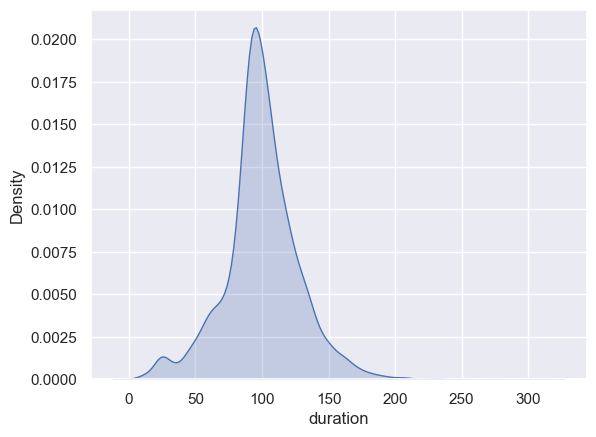

In [37]:
sns.set(style="darkgrid")
sns.kdeplot(data=movie_df['duration'], shade=True)

### Genre Analysis :

In [38]:
# Creating a subset, removing leading and trailing space and separating multiple countries in the same row
genre_counts = data['listed_in'].apply(lambda x: [genre.strip() for genre in x.split(',')])
genre_counts = genre_counts.explode('listed_in')

# count how often each country appears
genre_counts = genre_counts.value_counts().reset_index()

# rename the columns of the new DataFrame.
genre_counts.columns = ['genre', 'counts']

# create derived group to show only the top 10 species and group the rest as others.
top_countries = genre_counts.iloc[:10, 0].tolist()
genre_counts['genre_group'] = genre_counts['genre'].apply(lambda x: x if x in top_countries else 'Others')

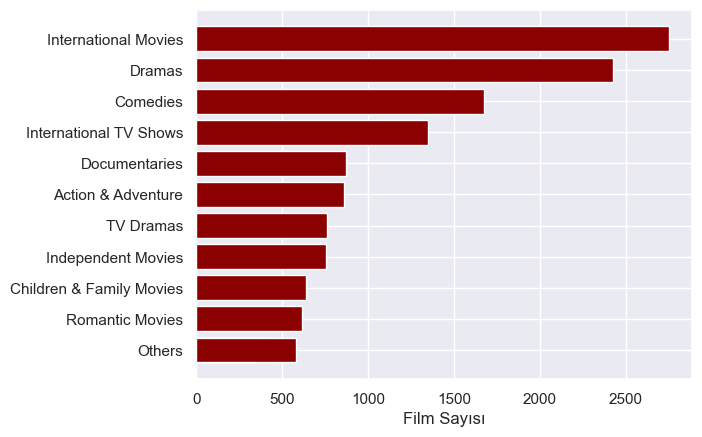

In [39]:
# create a bar chart to show the genre type

# sort genre_counts by counts column in descending order

genre_counts = genre_counts.sort_values('counts', ascending=True)

x = genre_counts['genre_group']
y = genre_counts['counts']

plt.barh(x,y, color='darkred')
plt.xlabel('Film Sayısı')
plt.show()

### Country Analysis :

In [40]:
# Count the number of titles from each country
country_counts = data['country'].value_counts()

# Choosing the top 10 countries.
top_countries = country_counts.head(10)
print(top_countries)

country
United States     2818
India              972
No Info            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64


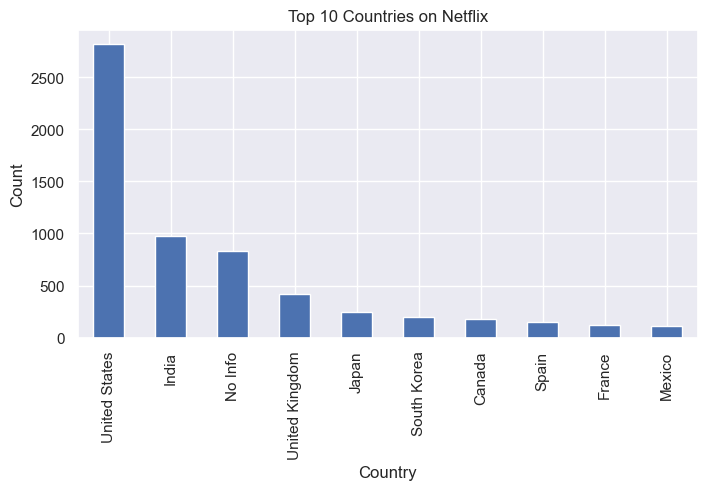

In [41]:
# show the graphic
plt.figure(figsize=(8, 4))
top_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries on Netflix')
plt.show()

In [42]:
#Content in Turkey
data_tr=data[data['country']=='Turkey']
nannef=data_tr.dropna()
import plotly.express as px
fig = px.treemap(nannef, path=['country','director'],
                  color='director', hover_data=['director','title'],color_continuous_scale='Purples')
fig.show()

In [44]:
#New TV series in Turkey.
newest_tr_series=data_tr.sort_values(by='release_year', ascending=False)[0:5]
newest_tr_series

show_id     type        title   director  \
703     s704  TV Show     The Gift    No Info   
972     s973  TV Show        Fatma    No Info   
1431   s1432    Movie  Stuck Apart    No Info   
1373   s1374  TV Show         50M2    No Info   
1212   s1213    Movie  Paper Lives  Can Ulkay   

                                                   cast country  \
703   Beren Saat, Mehmet Günsür, Metin Akdülger, Mel...  Turkey   
972   Burcu Biricik, Uğur Yücel, Mehmet Yılmaz Ak, H...  Turkey   
1431  Engin Günaydın, Haluk Bilginer, Binnur Kaya, Ö...  Turkey   
1373  Engin Öztürk, Kürşat Alnıaçık, Cengiz Bozkurt,...  Turkey   
1212  Çağatay Ulusoy, Emir Ali Doğrul, Ersin Arıcı, ...  Turkey   

            date_added  release_year rating   duration  \
703      June 17, 2021          2021  TV-MA  3 Seasons   
972     April 27, 2021          2021  TV-MA   1 Season   
1431   January 8, 2021          2021  TV-MA     97 min   
1373  January 27, 2021          2021  TV-MA   1 Season   
1212    March 12, 2021          2021  TV-MA     97 min   

                                            listed_in  \
703   International TV Shows, TV Dramas, TV Mysteries   
972   International TV Shows, TV Dramas, TV Thrillers   
1431           Comedies, Dramas, International Movies   
1373  International TV Shows, TV Dramas, TV Thrillers   
1212                     Dramas, International Movies   

                                            description  
703   A painter in Istanbul embarks on a personal jo...  
972   Reeling from tragedy, a nondescript house clea...  
1431  Entrenched in a midlife crisis, Aziz seeks sol...  
1373  Seeking to uncover the truth about his past, a...  
1212  In the streets of Istanbul, ailing waste wareh...

## Word Cloud

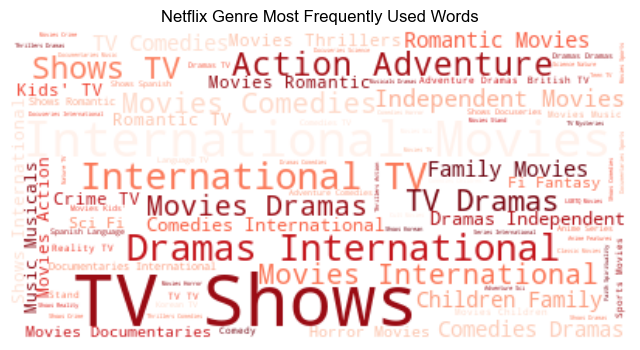

In [45]:
# Netflix Genre Most Frequently Used Words

titles = data['listed_in'].values

# Combining all titles into a single string
text = ' '.join(titles)

wordcloud = WordCloud(background_color='white', colormap='Reds').generate(text)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Netflix Genre Most Frequently Used Words', color='black')
plt.show()

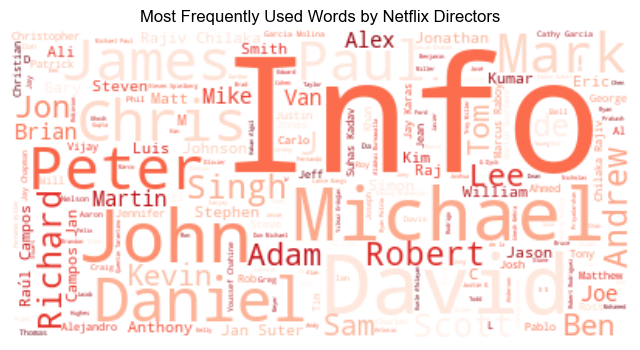

In [46]:
# Most Common Words Used by Netflix Directorstitles = data['director'].values

titles = data['director'].values

text = ' '.join(titles)
wordcloud = WordCloud(background_color='white', colormap='Reds').generate(text)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequently Used Words by Netflix Directors', color='black')
plt.show()

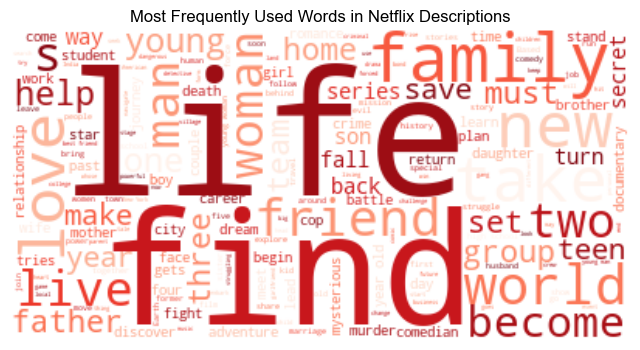

In [47]:
# Most Frequently Used Words in Netflix Descriptions

titles = data['description'].values

# Combining all titles into a single string
text = ' '.join(titles)

wordcloud = WordCloud(background_color='white', colormap='Reds').generate(text)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequently Used Words in Netflix Descriptions', color='black')
plt.show()

### 3 oldest movies and TV shows:

In [48]:
data[data['type'] == 'Movie'].sort_values('release_year')[0:3]

show_id   type                                          title  \
7790   s7791  Movie                                 Prelude to War   
8205   s8206  Movie                           The Battle of Midway   
8660   s8661  Movie  Undercover: How to Operate Behind Enemy Lines   

         director                       cast        country      date_added  \
7790  Frank Capra                    No Info  United States  March 31, 2017   
8205    John Ford  Henry Fonda, Jane Darwell  United States  March 31, 2017   
8660    John Ford                    No Info  United States  March 31, 2017   

      release_year rating duration                      listed_in  \
7790          1942  TV-14   52 min  Classic Movies, Documentaries   
8205          1942  TV-14   18 min  Classic Movies, Documentaries   
8660          1943  TV-PG   61 min  Classic Movies, Documentaries   

                                            description  
7790  Frank Capra's documentary chronicles the rise ...  
8205  Director John Ford captures combat footage of ...  
8660  This World War II-era training film dramatizes...

In [49]:
data[data['type'] == 'TV Show'].sort_values('release_year')[0:3]

show_id     type                                title  \
4250   s4251  TV Show    Pioneers: First Women Filmmakers*   
1331   s1332  TV Show  Five Came Back: The Reference Films   
7743   s7744  TV Show  Pioneers of African-American Cinema   

                                               director     cast  \
4250                                            No Info  No Info   
1331                                            No Info  No Info   
7743  Oscar Micheaux, Spencer Williams, Richard E. N...  No Info   

            country         date_added  release_year rating  duration  \
4250        No Info  December 30, 2018          1925  TV-14  1 Season   
1331  United States   February 9, 2021          1945  TV-MA  1 Season   
7743  United States   February 1, 2017          1946  TV-14  1 Season   

     listed_in                                        description  
4250  TV Shows  This collection restores films from women who ...  
1331  TV Shows  This collection includes 12 World War II-era p...  
7743  TV Shows  This newly preserved collection features more ...

### Best month for directors to release content - Forecast

#### Analyze the months with the least amount of content added, these months might be the best for directors to release their content for better audience engagement.

In [50]:
data_copy = data.copy()
net_date = data_copy[['date_added']]
net_date['year'] = net_date['date_added'].apply(lambda x : x.split(', ')[-1])
net_date['month'] = net_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
data_copy = net_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T


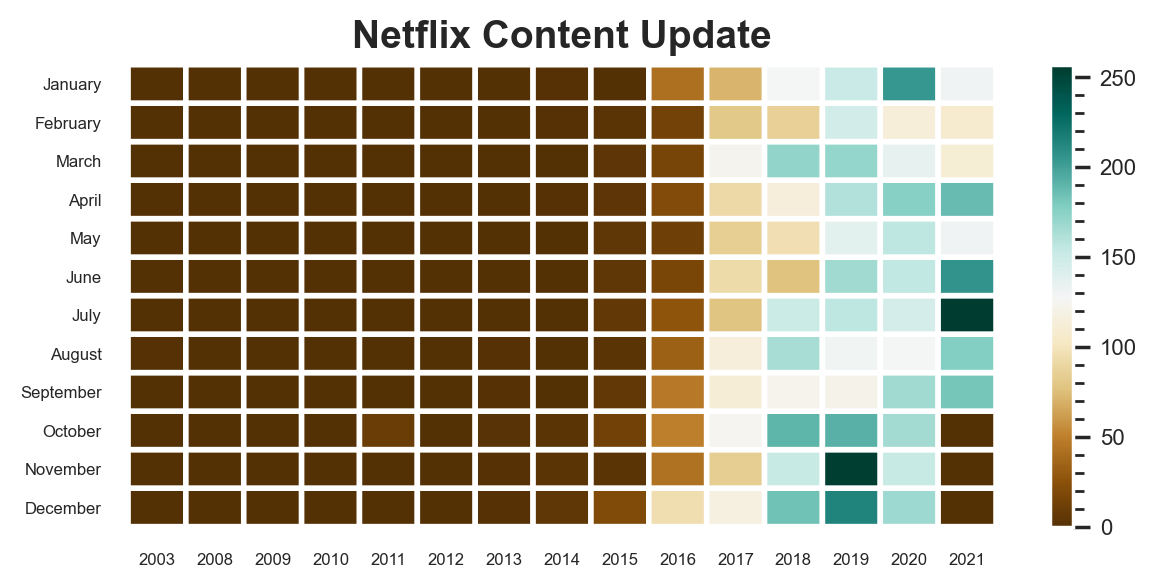

In [51]:
plt.figure(figsize=(7, 3), dpi=200)
plt.pcolor(data_copy, cmap='BrBG', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(data_copy.columns), 1), data_copy.columns, fontsize=6)
plt.yticks(np.arange(0.5, len(data_copy.index), 1), data_copy.index, fontsize=6)

plt.title('Netflix Content Update', fontsize=14, fontweight='bold')
cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

# Netflix Recommendation System

### Content Based Filtering

In [52]:
data['description'].head()

0    As her father nears the end of his life, filmm...
1    After crossing paths at a party, a Cape Town t...
2    To protect his family from a powerful drug lor...
3    Feuds, flirtations and toilet talk go down amo...
4    In a city of coaching centers known to train I...
Name: description, dtype: object

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object and remove all English stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

In [54]:
# Replace NaN with an empty string.
data['description'] = data['description'].fillna('')

#Create the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(data['description'])

tfidf_matrix.shape

(8807, 18895)

In [55]:
from sklearn.metrics.pairwise import linear_kernel

# Calculate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [56]:
#Create a reverse map of directories and movie titles
indices = pd.Series(data.index, index=data['title']).drop_duplicates()


In [57]:
# a function that takes a movie name as a parameter and outputs a list of the 10 most similar movies

def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Receiving similarity scores of all movies with given movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # ranking movies according to similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies.
    sim_scores = sim_scores[1:11]

    # Movie indexes.
    movie_indices = [i[0] for i in sim_scores]

    # Returning the top 10 most similar movies
    return data[['title','description']].iloc[movie_indices]

In [58]:
get_recommendations('Inception')

title  \
1939                     Dedh Ishqiya   
6304         Big Dreams, Small Spaces   
6726                  Eyyvah Eyyvah 2   
5202                  Strange Weather   
3796  Hyper HardBoiled Gourmet Report   
1536                        Incarnate   
1359                     The Bank Job   
1621               Quigley Down Under   
7855                         Rememory   
4131                Violet Evergarden   

                                            description  
1939  After failing to win the heart of an aristocra...  
6304  Writer and presenter Monty Don helps England's...  
6726  Hüseyin has found his father, and now has one ...  
5202  A grieving mother takes a road trip with her f...  
3796  To live is to eat. For people around the world...  
1536  An unconventional demon hunter faces his great...  
1359  A thief gets in over his head when he breaks i...  
1621  After traveling to Australia for a job, a shar...  
7855  A psychologist is murdered after unveiling a b...  
4131  The war is over, and Violet Evergarden needs a...

In [59]:
get_recommendations('War')

title  \
765                              Xtreme   
8032                          Skiptrace   
8644                         Twin Peaks   
5574                         One 2 Ka 4   
6044                   A Man Called God   
8276                   The Devil Inside   
598                        The American   
8240                           The Cell   
5493  Handsome: A Netflix Mystery Movie   
8171                               Tezz   

                                            description  
765   In this fast-paced and action-packed thriller,...  
8032  To capture a crime lord who killed his partner...  
8644  "Who killed Laura Palmer?" is the question on ...  
5574  When his partner is killed, a young cop is for...  
6044  Raised in America, government agent Choi Kang-...  
8276  At once spooky and grisly, this thriller follo...  
598   Dispatched to a small Italian town to await fu...  
8240  A special operations officer vows to get reven...  
5493  Homicide detective Gene Handsome sets out to s...  
8171  This high-octane thriller tells the story of a...

We can see that these are not very accurate, so we can try to add more metrics to improve model performance.

## Multi-metric (actor, director, title, description) based Recommendation System

In [60]:
features=['director','cast','description','title']
filters = data[features]

In [61]:
#Cleaning data by making all words lowercase
def clean_data(param):
        return str.lower(param.replace(" ", ""))

In [62]:
for feature in features:
    filters[feature] = filters[feature].apply(clean_data)
    
filters.head()

director                                               cast  \
0  kirstenjohnson                                             noinfo   
1          noinfo  amaqamata,khosingema,gailmabalane,thabangmolab...   
2  julienleclercq  samibouajila,tracygotoas,samueljouy,nabihaakka...   
3          noinfo                                             noinfo   
4          noinfo  mayurmore,jitendrakumar,ranjanraj,alamkhan,ahs...   

                                         description                title  
0  asherfathernearstheendofhislife,filmmakerkirst...    dickjohnsonisdead  
1  aftercrossingpathsataparty,acapetownteensetsou...          blood&water  
2  toprotecthisfamilyfromapowerfuldruglord,skille...            ganglands  
3  feuds,flirtationsandtoilettalkgodownamongthein...  jailbirdsneworleans  
4  inacityofcoachingcentersknowntotrainindia’sfin...          kotafactory

Create a "metadata soup", a string containing all the metadata we want to feed into our vectorizer

In [63]:
def create_soup(x):
    return x['director'] + ' ' + x['cast'] + ' ' + x['description']

In [64]:
filters['soup'] = filters.apply(create_soup, axis=1)

#### The next steps are the same as shown in drawing description based recommender. One important difference is that I use CountVectorizer() instead of TF-IDF.

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filters['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [66]:
# Reset the index of main DataFrame and create a reverse mapping as before
filters=filters.reset_index()
indices = pd.Series(filters.index, index=filters['title'])

In [67]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return data[['title','description']].iloc[movie_indices]

In [68]:
get_recommendations_new('Inception',cosine_sim2)

title  \
6376                                   Brick   
6019                                   50/50   
6272                        Before the Flood   
1842              The Trial of the Chicago 7   
1764                                 Snowden   
2132                           Project Power   
7308                                 Lincoln   
6872                       Gone are the Days   
3452                          Peaky Blinders   
8082  Star Wars: Episode VIII: The Last Jedi   

                                            description  
6376  Teenage loner Brendan Fry navigates his high s...  
6019  An otherwise healthy twentysomething has a com...  
6272  Leonardo DiCaprio crisscrosses the globe to in...  
1842  What was supposed to be a peaceful protest tur...  
1764  This thriller traces Edward Snowden's journey ...  
2132  An ex-soldier, a teen and a cop collide in New...  
7308  Director Steven Spielberg takes on the towerin...  
6872  As a notorious outlaw comes to grips with his ...  
3452  A notorious gang in 1919 Birmingham, England, ...  
8082  As the remnants of the Resistance flee Kylo Re...

In [69]:
get_recommendations_new('War',cosine_sim2)

title  \
4752                  Smoking   
2690                   Code 8   
7410  Martial Arts of Shaolin   
802            Ninja Assassin   
2680   Puerto Ricans in Paris   
3800           The Perfection   
6185                   Arthur   
8242        The Charnel House   
8307    The Forbidden Kingdom   
787        Cradle 2 the Grave   

                                            description  
4752  Seeking a greater justice, a band of homeless ...  
2690  In a city where super-powered people are ostra...  
7410  In ancient China, Zhi Ming trains at the legen...  
802   A former assassin must protect himself and a E...  
2680  New York police detectives Luis and Eddie expe...  
3800  In this twisty horror-thriller, a once-promisi...  
6185  Russell Brand stars in this remake as a philan...  
8242  After an architect transforms a slaughterhouse...  
8307  Jackie Chan and Jet Li star in this rousing ad...  
787   When a jewel thief pulls off a risky diamond h...